In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [ ]:
show_analytics_TSNE_and_umap = True

In [44]:
data = pd.read_csv('../data/adult.data', header=None)
data_test = pd.read_csv('../data/adult.test', header=None)

In [45]:
# Renomear as colunas
columns = ['Idade', 'Classe Trabalhadora', 'fnlwgt', 'Educação', 'N da Educação', 'Estado Civil', 'Ocupação', 'Relacionamento', 'Raça', 'Sexo', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana', 'País de Origem', 'Classe']
data.columns = columns
data_test.columns = columns

In [46]:
data.head()

,Idade,Classe Trabalhadora,fnlwgt,Educação,N da Educação,Estado Civil,Ocupação,Relacionamento,Raça,Sexo,Ganho de Capital,Perda de Capital,Horas por Semana,País de Origem,Classe
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
data.to_csv('../data/adult.data.csv', index=False, sep=';')

In [48]:
data['Classe'].value_counts()

Classe
<=50K    24720
>50K      7841
Name: count, dtype: int64

# Análise Exploratória dos dados

## 1. Compreensão dos Tipos de Dados
**Identificar e entender os diferentes tipos de dados presentes no conjunto de dados** 

- Visualizando os Tipos de Dados

In [49]:
# Visto que as os valores das colunas estão no formato correto, não e necessário fazer a conversão de tipos.
data.dtypes

Idade                   int64
Classe Trabalhadora    object
fnlwgt                  int64
Educação               object
N da Educação           int64
Estado Civil           object
Ocupação               object
Relacionamento         object
Raça                   object
Sexo                   object
Ganho de Capital        int64
Perda de Capital        int64
Horas por Semana        int64
País de Origem         object
Classe                 object
dtype: object

- Análise dos Tipos de Dados

1. Colunas Numéricas:
    - **Idade**: A idade é um número inteiro, representando a idade do cliente.
    - **fnlwgt**: Peso final, que é o número de pessoas que o censo acredita que a entrada representa.
    - **N da Educação**: Número de anos de educação que significa o número de anos de educação que o cliente teve.
    - **Ganho de Capital**: Ganho de capital do cliente (lucro).
    - **Perda de Capital**: Perda de capital do cliente (prejuízo).
    - **Horas por Semana**: Número de horas trabalhadas por semana.
2. Colunas Categóricas:
    - **Classe de Trabalho**: Classe de trabalho do cliente.
    - **Educação**: Nível de educação do cliente.
    - **Estado Civil**: Estado civil do cliente.
    - **Ocupação**: Ocupação do cliente.
    - **Relacionamento**: Relacionamento do cliente.
    - **Raça**: Raça do cliente (Branco, Preto, Asiático-Pacífico, Amer-Indian-Eskimo, Outro).
    - **Sexo**: Sexo do cliente (Masculino, Feminino).
    - **País de Origem**: País de origem do cliente.
    - **Classe**: Renda do cliente (<=50K ou >50K).

### Discussão

1. **Colunas Numéricas:**
   - As colunas numéricas são fundamentais para realizar análises estatísticas, como média, mediana, e dispersão dos dados.
   - Colunas como `Idade`, `N da Educação`, e `Horas por Semana` são intuitivamente contínuas e ajudarão a entender a distribuição e a tendência central dos dados.
   - `Ganho de capital` e `Perda de capital` apresentam valores extremos que precisarão ser explorados para detectar outliers.

2. **Colunas Categóricas:**
   - As colunas categóricas representam classes e são essenciais para análises de frequência, distribuição, e correlação entre diferentes grupos.
   - `Classe de Trabalho`, `Ocupação`, e `Estado civil` fornecerão insights sobre a divisão social e econômica dos indivíduos.
   - A variável `Classe` é a variável alvo para a classificação, e entender a distribuição das outras variáveis em relação a ela é essencial.

A Compreensão dos Tipos de Dados foi essencial para estabelecer uma base sólida para as análises subsequentes. A correta identificação e classificação dos dados permitirão uma análise mais precisa e informada, assegurando que os insights obtidos reflitam com precisão as características da população estudada.

***

## 2. Compreensão dos Tipos de Dados
**Calcular e analisar estatísticas resumidas para as colunas numéricas do conjunto de dados**

In [50]:
numeric_columns = ['Idade', 'fnlwgt', 'N da Educação', 'Ganho de Capital', 'Perda de Capital', 'Horas por Semana']
statistics = data[numeric_columns].describe()
statistics

,Idade,fnlwgt,N da Educação,Ganho de Capital,Perda de Capital,Horas por Semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Análise das Estatísticas Resumidas

1. Discussão sobre as Colunas Numéricas:

- Idade:

    - Média (mean): 38.58 anos
    - Mediana (50%): 37 anos
    - Desvio Padrão: 13.64 anos
    - *Análise: A distribuição da idade parece ser razoavelmente simétrica em torno da média. A variabilidade na idade (desvio padrão) é moderada, indicando uma distribuição de idades razoavelmente ampla entre os indivíduos.*

- fnlwgt:

    - Média (mean): 1.89
    - Mediana (50%): 1.78
    - Desvio Padrão (std): 1.05
    - *Análise: O fnlwgt é uma variável que pode ser interpretada como um fator de ajuste da amostra, refletindo quantos casos na população o caso individual representa. Esta variável tem uma grande variação, o que pode indicar a presença de outliers ou a necessidade de normalização.*

- N dA Educação:

    - Média (mean): 10.08
    - Mediana (50%): 10
    - Desvio Padrão (std): 2.57
    - *Análise: Esta variável, que indica o número de anos de educação do indivíduo, apresenta uma distribuição relativamente centralizada em torno de 10 anos, o que é consistente com o nível de ensino médio (High School) nos EUA.*

- Ganho de Capital:

    - Média: 1,077.65
    - Mediana (50%): 0
    - Desvio Padrão (std): 7,385.29
    - *Análise: A maioria dos valores de ganho de capital é zero, indicando que poucos indivíduos possuem ganhos de capital significativos. A alta variação e a diferença entre a Média (mean) e a mediana sugerem a presença de outliers significativos.*

- Perda de Capital:

    - Média: 87.30
    - Mediana (50%): 0
    - Desvio Padrão (std): 402.96
    - *Análise: Semelhante ao ganho de capital, a maioria das pessoas não registra perda de capital, o que pode levar à concentração dos dados em valores baixos ou nulos.*

- Horas por Semana:

    - Média (mean): 40.44 horas
    - Mediana (50%): 40 horas
    - Desvio Padrão (std): 12.35 horas
    - *Análise: A maioria dos indivíduos trabalha em torno de 40 horas por semana, o que é esperado para empregos de tempo integral. A distribuição é bastante concentrada, com pouca variabilidade, exceto por alguns outliers que trabalham significativamente menos ou mais horas.*

### Discussão

1. **Peso Final (`fnlwgt`):**
   - **Justificativa:** O `fnlwgt` pode ser uma característica complicada para interpretação e, dependendo do contexto da análise, pode não agregar valor se o objetivo não for realizar uma análise ponderada da amostra. Para classificações simples de renda, esta variável pode ser desconsiderada.

2. **Ganho de Capital e Perda de Capital:**
   - **Justificativa:** Ambas as variáveis têm uma grande quantidade de zeros, o que pode indicar que elas têm pouca variação para a maioria da população. A presença de outliers extremos também pode dificultar a interpretação. No entanto, dependendo do foco da análise, essas variáveis podem ser mantidas ou desconsideradas.

Nesta etapa, as estatísticas resumidas fornecem uma visão valiosa sobre a distribuição e as características centrais dos dados numéricos. Ao identificar variáveis com pouca variação ou que podem introduzir complexidade desnecessária, podemos decidir se devem ser desconsideradas ou tratadas de forma diferente nas etapas subsequentes.

***

## 3. Tratamento de Valores Ausentes
**Identificar e tratar valores ausentes no conjunto de dados, utilizando estratégias de imputação ou exclusão**

In [51]:
missing_data = data.isnull().sum()
missing_data

Idade                  0
Classe Trabalhadora    0
fnlwgt                 0
Educação               0
N da Educação          0
Estado Civil           0
Ocupação               0
Relacionamento         0
Raça                   0
Sexo                   0
Ganho de Capital       0
Perda de Capital       0
Horas por Semana       0
País de Origem         0
Classe                 0
dtype: int64

### Discussão

- Foi identificado que o conjunto de dados não possue valores ausentes. portanto, podemos pensar em algumas estrategias para tratar valores ausentes, como:
    - Imputação pela Moda (para variáveis categóricas):
        - Substituir os valores ausentes pela moda (valor mais frequente) da variável.
        ```python
        # Exemplo
        data['coluna'].fillna(data['coluna'].mode()[0], inplace=True)
        ```
    - Exclusão de Linhas (Quando o impacto é mínimo):
        - Excluir as linhas com valores ausentes, se o número de linhas afetadas for pequeno.
        ```python
        # Exemplo
        data.dropna(inplace=True)
        ```

***

## 4. Visualização de Dados
**Visualizar as distribuições das características numéricas do conjunto de dados usando histogramas e box plots para identificar padrões e outliers**

- 1. Visualização com Histogramas 

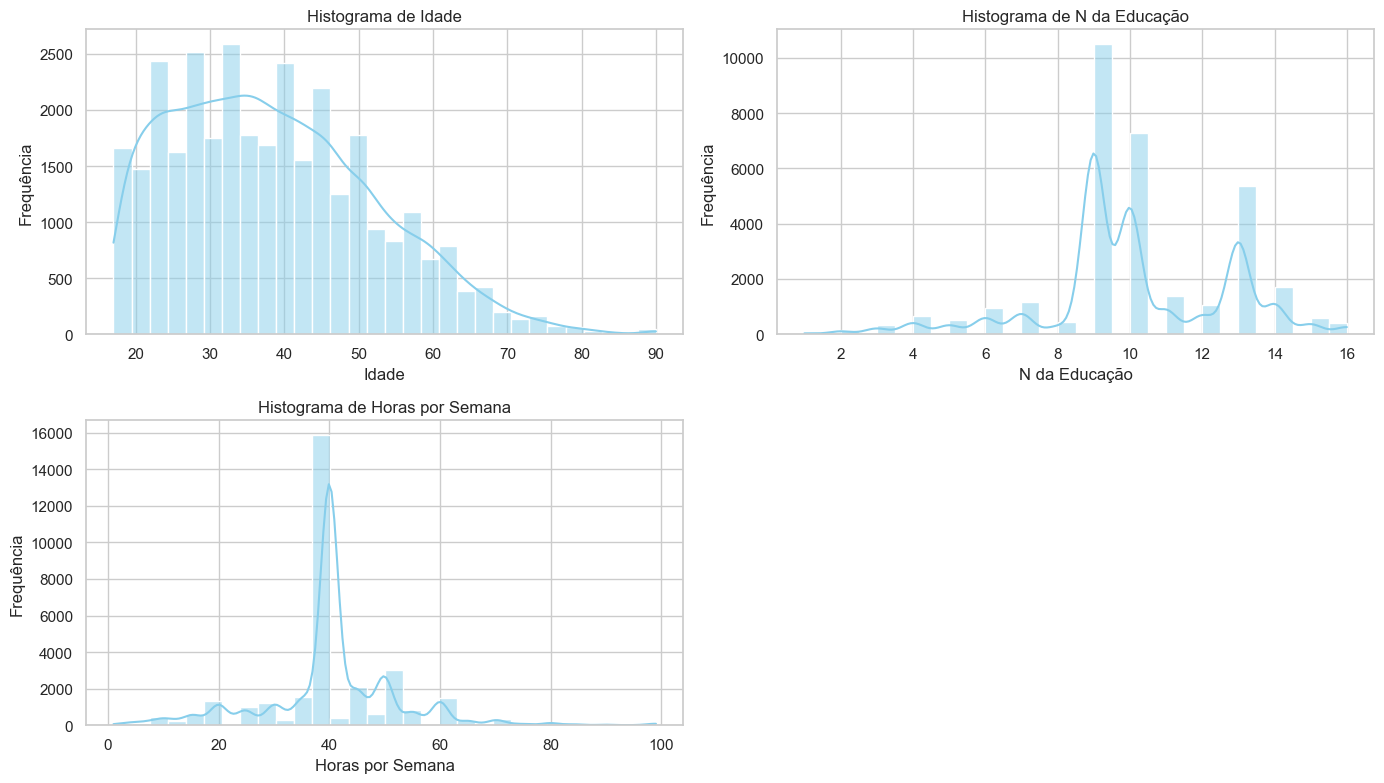

In [52]:
# Configurações gerais para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Histogramas para variáveis numéricas
numeric_columns_plot = ['Idade', 'N da Educação', 'Horas por Semana']

for i, column in enumerate(numeric_columns_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('../plots/histograma_variaveis_numericas.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

- 2. Visualização com Box Plots

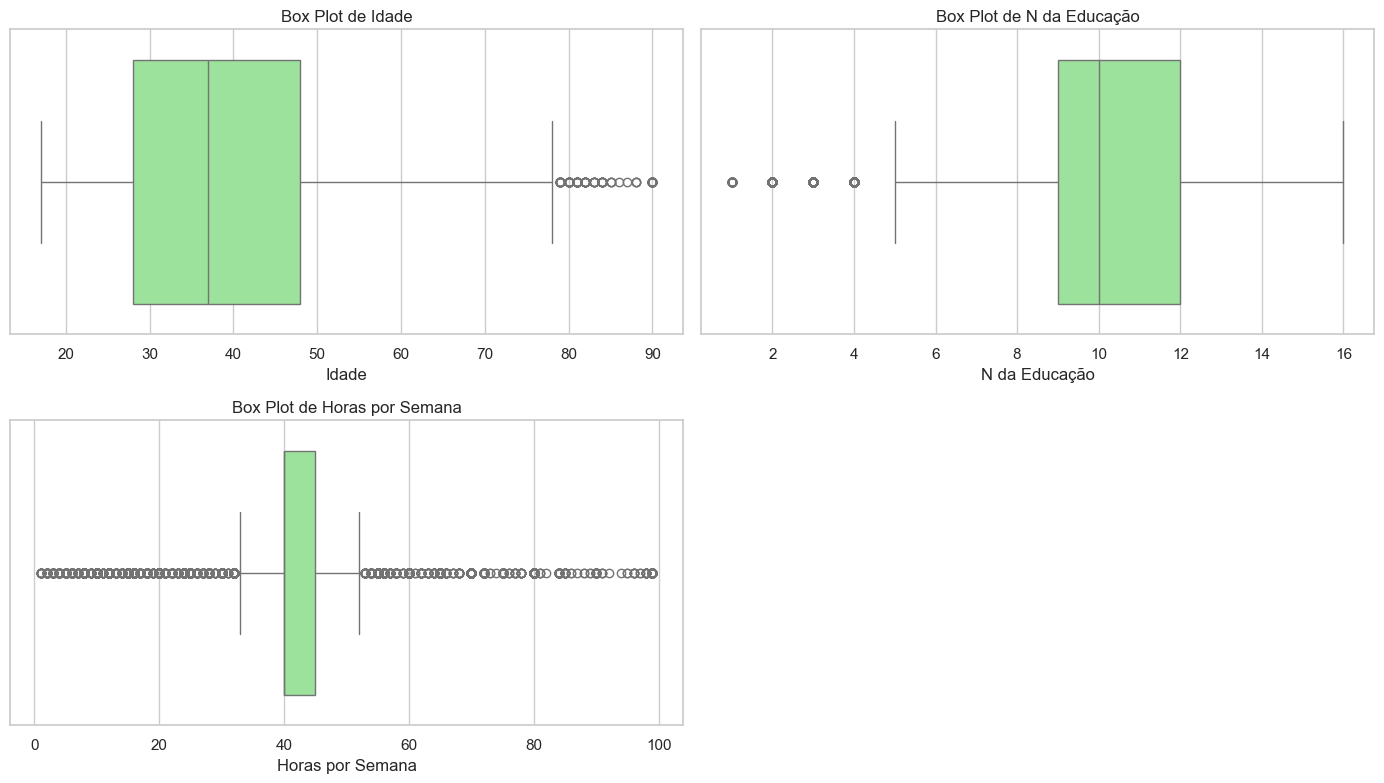

In [53]:
plt.figure(figsize=(14, 8))

for i, column in enumerate(numeric_columns_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f'Box Plot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.savefig('../plots/boxplot_variaveis_numericas.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

- Analise dos graficos de Histogramas e Box Plots
    1. Idade: A distribuição da idade reflete uma população predominantemente adulta e economicamente ativa. Os outliers em idades mais avançadas, embora poucos, indicam que uma pequena parte da população continua trabalhando além da idade típica de aposentadoria.

    2. Educação: A maioria das pessoas tem um nível de educação que corresponde ao ensino médio ou superior. A distribuição indica que o nível educacional médio na amostra é relativamente alto, com a maioria dos indivíduos tendo completado pelo menos o ensino médio.

    3. Horas por Semana: A maioria das pessoas trabalha em tempo integral, mas a presença de outliers sugere que há variações significativas em estilos de vida e tipos de emprego. Esses outliers podem ser importantes para análises futuras, especialmente se estivermos interessados em entender o impacto do tempo de trabalho na renda.

- 3. Técnicas Avançadas de Projeção de Dados (t-SNE e UMAP)

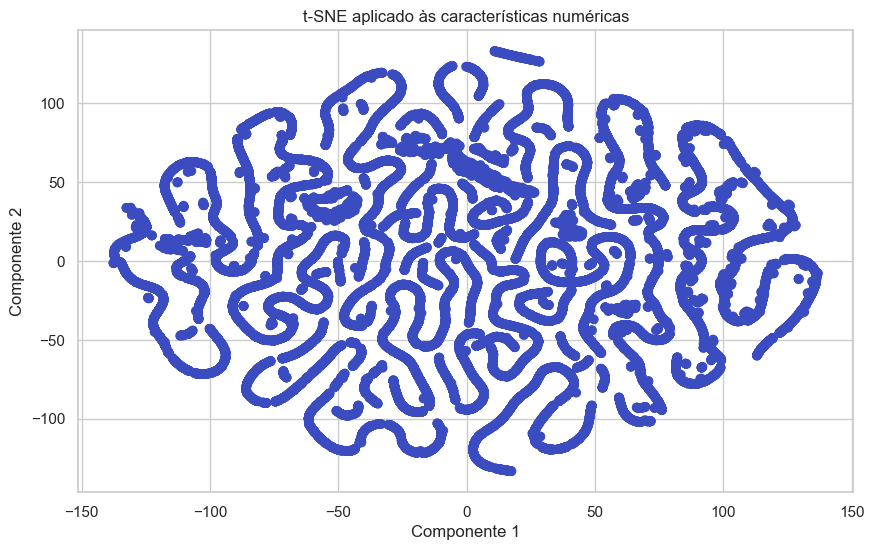

c:\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Python312\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


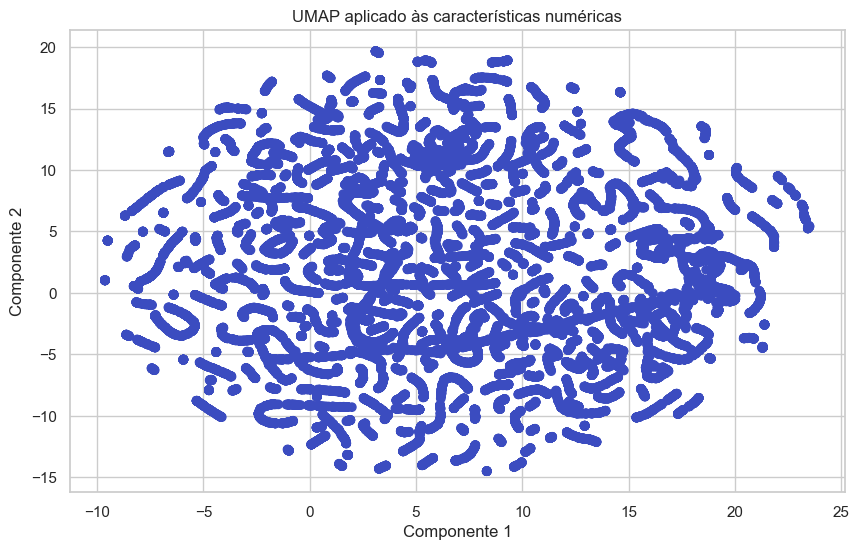

In [54]:
# Selecionando algumas características numéricas para t-SNE e UMAP
if show_analytics_TSNE_and_umap:    
    features = data[numeric_columns]

    # Aplicando t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)

    # Visualizando t-SNE
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Classe'].apply(lambda x: 1 if x == '>50K' else 0), cmap='coolwarm')
    plt.title('t-SNE aplicado às características numéricas')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.savefig('../plots/tsne_aplicado_caracteristicas_numericas.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    # Aplicando UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_results = reducer.fit_transform(features)

    # Visualizando UMAP
    plt.figure(figsize=(10, 6))
    plt.scatter(umap_results[:, 0], umap_results[:, 1], c=data['Classe'].apply(lambda x: 1 if x == '>50K' else 0), cmap='coolwarm')
    plt.title('UMAP aplicado às características numéricas')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.savefig('../plots/umap_aplicado_caracteristicas_numericas.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()